In [17]:
import pandas as pd
import joblib as jl
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importation du jeu de données

In [19]:
def app_logistic_regression(read_csv) :

  df_production = pd.read_csv(read_csv, index_col = 'id',
                              usecols = ['id','height_left', 'height_right', 'margin_low', 'margin_up', 'length'])
  df_norm_pro = df_production.copy()
  # Normalisation des données
  numeric_range_pro = ['height_left', 'height_right', 'margin_low', 'margin_up', 'length']
  scaled_org_pro = preprocessing.StandardScaler().fit_transform(df_norm_pro[numeric_range_pro])
  df_norm_pro[numeric_range_pro] = scaled_org_pro

  # Importation le modèle
  logreg = jl.load('/content/drive/MyDrive/Colab Notebooks/P10/LIANG_Xiuting_3_modele_logreg_code_082022.pkl') 
  logreg.predict(df_norm_pro)


  # Créer le dataframe
  df_production['resultat_logreg'] = logreg.predict(df_norm_pro)
  df_production['probabilité'] = logreg.predict_proba(df_norm_pro).round(6)[:,1:2]
  df_result = df_production[['resultat_logreg', 'probabilité']]
  df_result = df_result.reset_index()

  return df_result


# Résultat

In [20]:
# Importation du jeu de données
df = app_logistic_regression('/content/drive/MyDrive/Colab Notebooks/P10/billets_production.csv')
df

,id,resultat_logreg,probabilité
0,A_1,False,0.062879
1,A_2,False,0.011737
2,A_3,False,0.007293
3,A_4,True,0.999828
4,A_5,True,0.999997


# Visualisation avec le graphique

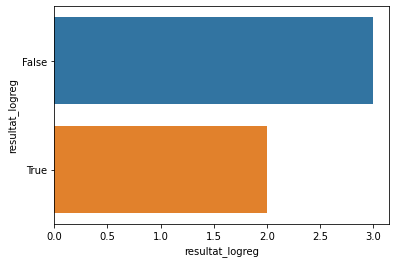

In [21]:
# Créer dataframe pour les nombre de True et False
df['resultat_logreg'] = df['resultat_logreg'].astype(str)
df1 = df.groupby('resultat_logreg')['resultat_logreg'].count()
df1 = pd.DataFrame(df1)

# Créer graphique
x = df1['resultat_logreg']
y = df1.index
sns.barplot(data = df1, x = x, y = y)